# SIMPLE LINEAR REGRESSION MODEL IN PYTHON

## We are going to build a simple linear regression on a data set from King County located in Seattle, Washington.

## The entire process will be done with the Scikit Learn library, we are going to separate the data that goes for training and testing and then we will make predictions and see if they match the expected data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1.- EXPLORING DATA

In [2]:
df_kchouse = pd.read_csv("kc_house_data.csv")

### We are going to change the columns' names for better understanding

In [3]:
df_kchouse.columns = ["AreaFT","PricesUSD"]

### Let's observe the Data Set size and some values

In [4]:
df_kchouse.shape

(21613, 2)

In [5]:
df_kchouse.head(10)

,AreaFT,PricesUSD
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


# 2.- TRAINING AND TESTING DATA

### We are going to split the data in 75% for training and 25% for testing, this step will help in the future

In [6]:
X_train, X_test, y_train, y_test= train_test_split(df_kchouse.AreaFT.values.reshape(-1,1), df_kchouse.PricesUSD.values, random_state = 11)

In [7]:
X_train.shape

(16209, 1)

In [8]:
X_test.shape

(5404, 1)

# 3.- LINEAR REGRESSION BUILDING

### Let's choose an estimator, in this case is going to be 'reglin'

In [9]:
reglin = LinearRegression()

### Let's do the fit, I mean, the training

In [10]:
reglin.fit(X = X_train, y = y_train)

LinearRegression()

### Let's calculate the coefficient and the interception, to understand this, we need to look the linear equation y= mx + b. The coefficient (slope) is for "m" and the interception is for "b"

In [11]:
reglin.coef_

array([283.3312025])

In [12]:
reglin.intercept_

-47648.88872213906

# 4.- PREDICTED AND EXPECTED VALUES

In [13]:
predicted = reglin.predict(X_test)
expected = y_test

### We are going to do a for-loop to display the predicted and the expected values of 300 by 300 since there are 5,404 values for the test data and only show 19 records.

In [14]:
for p,e in zip (predicted[::300],expected[::300]):
    print(f'Predicted: {p:.2f}, Expected:{e:.2f}')

Predicted: 264015.43, Expected:343566.00
Predicted: 782511.53, Expected:650880.00
Predicted: 295748.53, Expected:340000.00
Predicted: 439680.78, Expected:770000.00
Predicted: 884510.77, Expected:775000.00
Predicted: 278181.99, Expected:420000.00
Predicted: 298015.18, Expected:940000.00
Predicted: 521846.83, Expected:627800.00
Predicted: 538846.70, Expected:880000.00
Predicted: 932677.07, Expected:730000.00
Predicted: 419847.60, Expected:610000.00
Predicted: 198849.26, Expected:395000.00
Predicted: 638012.62, Expected:675000.00
Predicted: 479347.15, Expected:301350.00
Predicted: 561513.20, Expected:950000.00
Predicted: 632346.00, Expected:569000.00
Predicted: 368847.98, Expected:432000.00
Predicted: 385847.85, Expected:412500.00
Predicted: 997843.25, Expected:1130000.00


In [15]:
y_test[0]

343566.0

### It was obvious that the predictions were not going to be optimal since it is only predicting based on the area of the houses, however, we are going to calculate the R^2 to observe the model performance.

In [16]:
metrics.r2_score(expected,predicted) * 100

48.076807615224624

### Now, we are going to use the built model to predict some prices.

In [17]:
predict = (lambda x:reglin.coef_ * x + reglin.intercept_)

In [18]:
df_kchouse.sample(5)

,AreaFT,PricesUSD
3508,3010,695000.0
4245,3110,755000.0
9204,2130,1070000.0
8153,1330,183000.0
18134,1890,330000.0


### The behavior is interesting, some predictions are closed to the expected or real values and in some there are a wide difference. Let's explain this, if the predicted value is closed to the expected one, it is because the house could be in a average place in seattle, if the prediction is too low it is because the house could be in a fancy or rich neighborhood, otherwise, i the prediction is too high it is because the house could be in a undistinguished or poor neigborhood.

In [19]:
predict(1620)

array([411347.65932287])

### Now, we are going to display the linear regression function in a scatter plot.

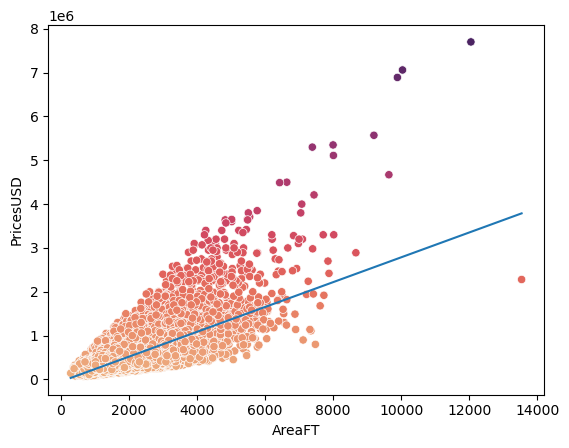

In [20]:
axes = sns.scatterplot(data = df_kchouse, x = "AreaFT", y = "PricesUSD", hue = "PricesUSD", palette = "flare", legend = False)

x = np.array([min(df_kchouse.AreaFT.values), max(df_kchouse.AreaFT.values)])
y = predict(x)

line = plt.plot (x,y)

# 5.- CONCLUSION

## The model as I said, is not optimal because is predicted based in only one variable, however, there is something to improve the model, that is, identifying and locating the outliers in the Data Set, then dropping them and build the model again.